# Examen 

## Problema 1
(a) Usando Simpy, declara las funciones:$$
y(x) = \sin(x)
$$

$$
z(x) = \cos(x)
$$$$
w(x) = \frac{1}{\cos(x) + \sin(2x)}
$$


In [26]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

#Se crean las funciones

x=Symbol('x')
y=Function('y')(x)
y

y(x)

In [27]:
y=sin(x)
y

sin(x)

In [28]:
z=Function('z')(x)
z

z(x)

In [29]:
z=cos(x)
z

cos(x)

In [30]:
w=Function('w')(x)
w

w(x)

In [31]:
w=1/(cos(x)+sin(2*x))
w

1/(sin(2*x) + cos(x))

(b) Obtén la derivada de $g(x)$

$$
g(x) = y(x)*z(x)
$$


In [32]:
#Se declara la nueva función g
g=Function('g')(x)
g

g(x)

In [33]:
g=(y*z)
g

sin(x)*cos(x)

In [34]:
#Se calcula la derivada
diff(g)

-sin(x)**2 + cos(x)**2

(c) Grafica $w(x)$ en el rango $[0,1]$



(0.0, 1.0)

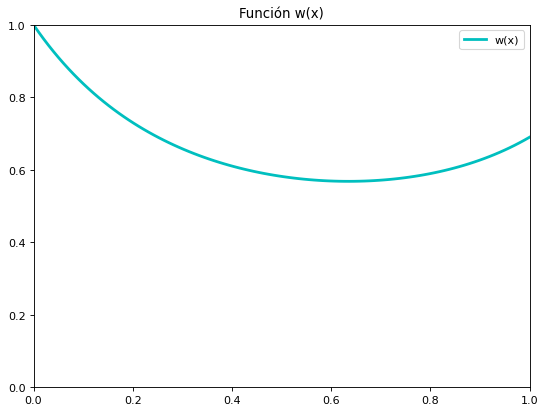

In [93]:
#Se crea el array X  para X
X = np.linspace(0, 1, 100, endpoint=True)

#Se crea una lista para agregar los valores de la función w(x)
w_lis=[]

#Mediante un for, se agregan a la lista los valores de w(x) sustituyendo los valores de X
for i in X:
    w_lis.append(w.subs(x,i))
    
#Se crea la gráfica
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(X, w_lis, color="c", linewidth=2.5, linestyle="-", label="w(x)")
plt.legend(loc='best')
plt.title('Función w(x)')
plt.xlim(0,1)
plt.ylim(0,1)

(d) Integra de manera indefinida $w(x)$ y luego evalúala desde $0$ a $1$.



In [36]:
integrate(w,x)

Integral(1/(sin(2*x) + cos(x)), x)

In [37]:
integrate(w,(x,0,1))

Integral(1/(sin(2*x) + cos(x)), (x, 0, 1))

In [38]:
#La integral pasado no la resulve Python, así que ahora se intenta con g(x)
integrate(g,x)

sin(x)**2/2

In [39]:
integrate(g,(x,0,1))

sin(1)**2/2

(e) ¿Cuál es el límite de $y(x), z(x), g(x)$ y $w(x)$ cuando $x \to 0$.?


In [40]:
#Límite de y(x)
limit(y,x,0)

0

In [41]:
#Límite de z(x)
limit(z,x,0)

1

In [42]:
#Límite de w(x)
limit(w,x,0)

1


(f) Expanda $y(x)$ y $z(x)$ hasta 3 orden en serie de Taylor.

In [43]:
#Serie de Taylor de y(x)
a=Symbol('a')

p1=((diff(y,x)).subs(x,a))*(x-a)

p2=(((diff(diff(y,x))).subs(x,a))*((x-a)**2))/2

p3=(((diff(diff(diff(y,x)))).subs(x,a))*((x-a)**3))/(factorial(3))

polTay_y=y+p1+p2+p3
polTay_y

-(-a + x)**3*cos(a)/6 - (-a + x)**2*sin(a)/2 + (-a + x)*cos(a) + sin(x)

In [44]:
#con a=0
simplify(polTay_y.subs(a,0))

-x**3/6 + x + sin(x)

In [45]:
#Serie de Taylor de z(x)

p1=((diff(z,x)).subs(x,a))*(x-a)

p2=(((diff(diff(z,x))).subs(x,a))*((x-a)**2))/2

p3=(((diff(diff(diff(z,x)))).subs(x,a))*((x-a)**3))/(factorial(3))

polTay_z=y+p1+p2+p3
polTay_z

(-a + x)**3*sin(a)/6 - (-a + x)**2*cos(a)/2 - (-a + x)*sin(a) + sin(x)

In [46]:
#con a=0
simplify(polTay_z.subs(a,0))

-x**2/2 + sin(x)

## Problema 2

### El atractor de Rössler esta descrito por el siguiente conjunto de ecuaciones:

$$
\frac{dx}{dt} = -y -z
$$$$
\frac{dy}{dt} = x + ay
$$$$
\frac{dz}{dt} = b + z(x-c)
$$


(a) Resuelva las ecuaciones numéricamente para

$$
a=0.13 \quad b=0.2 \quad c=6.5 
$$
y condiciones iniciales

$$
x(0)=0 \quad y(0)=0 \quad z(0)=0 
$$
use el método de Runge-Kutta de 2do orden.



In [47]:
#Se implementan las constantes y los arreglos necesarios


N = 1000 # número de pasos

tau = 25.0 # tiempo de la simulación

dt = tau/(float)(N-1)  # tamaño del paso

time = np.linspace(0, tau, N)

y = np.zeros([N,3])   #estado

a=0.13
b=0.2
c=6.5


#RK2
def RK2(y, t, dt, derivadas):
    k0 = dt*derivadas(y, t)
    k1 = dt*derivadas(y + k0, t + dt)
    y_next = y + 0.5*(k0 + k1)
    
    return y_next


#atractor de Rössler
def Rossler(estado,tiempo):
    g0=-estado[1]-estado[2]
    g1=estado[0]+a*estado[1]
    g2=b+(estado[2])*(estado[0]-c)
    return np.array([g0, g1,g2])
    


#Condiciones iniciales
y[0,0] = 0
y[0,1] = 0
y[0,2] = 0


for j in range(N-1):
    y[j+1] = RK2(y[j], time[j], dt, Rossler)
    


(b) Muestra en una gráfica el comportamiento de las soluciones en el tiempo (i.e. grafica $x(t)$, $y(t)$ y $z(t)$).


Text(0.5, 0, 'tiempo (s)')

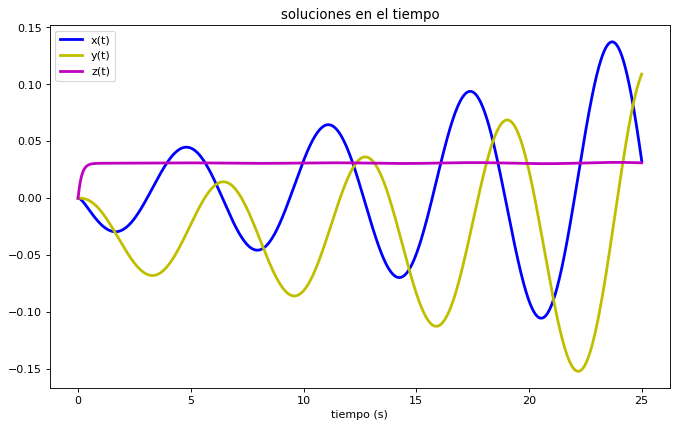

In [48]:
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(time,y[:,0], color="b", linewidth=2.5, label='x(t)')
plt.plot(time,y[:,1], color="y", linewidth=2.5, label='y(t)')
plt.plot(time,y[:,2], color="m", linewidth=2.5, label='z(t)')

plt.legend(loc='best')
plt.title('soluciones en el tiempo')
plt.xlabel('tiempo (s)')


(c) Muestra como se ve el atractor de Rössler en 3D (i.e. en el espacio).

ValueError: Argument Z must be 2-dimensional.

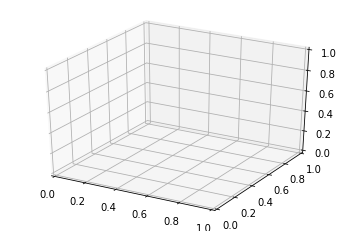

In [98]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm


# Creamos la figura
fig = plt.figure()

# Agrrgamos un plano 3D
ax1 = fig.add_subplot(111,projection='3d')

#se crean listas para poder pasar a array los valore de x,y,z
x_lis=[]
y_lis=[]
z_lis=[]

#En este for los valores se agregan a la lista
for i in range(len(y)):
    x_lis.append(y[i,0])
    y_lis.append(y[i,1])
    z_lis.append(y[i,2])

#Aquí las listas se vuelven arrays
x_arr=np.array(x_lis)
y_arr=np.array(y_lis)
z_arr=np.array(z_lis)


X,Y=np.meshgrid(x_arr,y_arr)

Z=(z_arr)

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet,linewidth=0, antialiased=False)

# Mostramos el gráfico
plt.show()